In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.stats import skew, kurtosis

import warnings

warnings.filterwarnings(action = 'ignore')

## 1. 데이터 입력

### 1.1 행정동, 밀도 데이터 로드 및 병합

In [3]:
tmp_df = pd.read_csv('성형외과제거_및_버스수정_행정동_변환_1101.csv')
pd.set_option('display.max_columns',35)
# tmp_df
tmp_df.rename(columns={'Unnamed: 0':'index'},inplace=True)
tmp_df.set_index('index',inplace=True)

In [4]:
tmp_df.columns

Index(['SUBWAY_NUM', 'STARBUCKS_NUM', 'SPORT_NUM', 'SAFE_DLVR_NUM',
       'POLICE_NUM', 'PHARM_NUM', 'NOISE_VIBRATION_NUM', 'MID_SCH_NUM',
       'MC_NUM', 'LEISURE_NUM', 'KINDER_NUM', 'KIDS_NUM', 'HIGH_SCH_NUM',
       'GYM_NUM', 'GOLF_NUM', 'FIRE_NUM', 'ELE_SCH_NUM', 'DPTM_NUM', 'CON_NUM',
       'CHILD_MED_NUM', 'CCTV_NUM', 'CAR_SHR_NUM', 'CAFE_NUM', 'BIKE_NUM',
       'ANI_HSPT_NUM', 'ACADEMY_NUM', 'HOSPITAL_NUM', 'GU', 'DONG',
       'DONG_CODE', 'BUS_CNT'],
      dtype='object')

In [7]:
tmp_df = tmp_df[['GU','DONG','DONG_CODE','SUBWAY_NUM','STARBUCKS_NUM','SPORT_NUM','SAFE_DLVR_NUM','POLICE_NUM','PHARM_NUM','NOISE_VIBRATION_NUM','MID_SCH_NUM','MC_NUM','LEISURE_NUM','KINDER_NUM','KIDS_NUM','HOSPITAL_NUM','HIGH_SCH_NUM','GYM_NUM','GOLF_NUM','FIRE_NUM','ELE_SCH_NUM','DPTM_NUM','CON_NUM','CHILD_MED_NUM','CCTV_NUM','CAR_SHR_NUM','CAFE_NUM','BIKE_NUM','ANI_HSPT_NUM','ACADEMY_NUM','BUS_CNT']]
tmp_df

,GU,DONG,DONG_CODE,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,POLICE_NUM,PHARM_NUM,NOISE_VIBRATION_NUM,MID_SCH_NUM,MC_NUM,LEISURE_NUM,KINDER_NUM,KIDS_NUM,HOSPITAL_NUM,HIGH_SCH_NUM,GYM_NUM,GOLF_NUM,FIRE_NUM,ELE_SCH_NUM,DPTM_NUM,CON_NUM,CHILD_MED_NUM,CCTV_NUM,CAR_SHR_NUM,CAFE_NUM,BIKE_NUM,ANI_HSPT_NUM,ACADEMY_NUM,BUS_CNT
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,0.333333,0.333333,0.0,1.000000,2.000000,4.333333,18816.000000,2.000000,0.0,1.000000,0.000000,0.000000,11.666667,3.0,0.0,0.000000,1.0,2.000000,0.0,4.000000,7.333333,56.666667,1.000000,39.666667,5.666667,2.000000,18.000000,14.0
1,종로구,사직동,1111053000,1.333333,7.333333,0.0,0.000000,3.000000,17.333333,22848.000000,0.000000,0.0,1.000000,10.000000,0.000000,74.666667,0.0,18.0,3.000000,0.0,2.000000,0.0,20.000000,10.333333,41.666667,5.000000,100.666667,11.666667,1.000000,19.000000,16.0
2,종로구,삼청동,1111054000,1.000000,1.000000,1.0,0.000000,1.000000,2.000000,14112.000000,1.000000,0.0,0.000000,10.000000,0.000000,7.000000,1.0,3.0,0.000000,0.0,0.000000,0.0,2.000000,1.000000,22.000000,1.000000,52.000000,7.000000,0.000000,2.000000,11.0
3,종로구,부암동,1111055000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,6048.000000,1.000000,0.0,0.000000,0.000000,0.000000,4.000000,1.0,2.0,2.000000,1.0,4.000000,0.0,8.000000,5.000000,41.000000,5.000000,30.000000,5.000000,3.000000,24.000000,9.0
4,종로구,평창동,1111056000,0.000000,1.000000,0.0,0.000000,1.000000,5.000000,4032.000000,0.000000,0.0,0.000000,0.000000,0.000000,14.000000,1.0,5.0,5.000000,0.0,0.000000,0.0,6.000000,10.000000,21.000000,0.000000,36.000000,7.000000,0.000000,28.000000,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,0.333333,1.333333,0.0,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,1.666667,16.666667,0.666667,59.333333,0.0,10.0,4.666667,1.0,1.333333,0.0,38.666667,4.000000,52.000000,6.666667,47.666667,6.000000,2.666667,63.333333,11.0
422,강동구,성내3동,1174066000,0.333333,1.333333,0.0,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,1.666667,16.666667,0.666667,59.333333,0.0,10.0,4.666667,1.0,1.333333,0.0,38.666667,4.000000,52.000000,6.666667,47.666667,6.000000,2.666667,63.333333,9.0
423,강동구,길동,1174068500,1.000000,2.000000,0.0,1.000000,0.000000,35.000000,4327.000000,1.000000,0.0,3.000000,20.000000,1.000000,120.000000,0.0,18.0,9.000000,1.0,6.000000,0.0,76.000000,10.000000,119.000000,10.000000,63.000000,9.000000,8.000000,100.000000,28.0


In [6]:
density_df = pd.read_excel('../data/인구밀도.xlsx')
density_df

,GU,DONG,POP,AREA,DENSITY
0,종로구,사직동,9636,1.23,7834
1,종로구,삼청동,2739,1.49,1838
2,종로구,부암동,9782,2.27,4309
3,종로구,평창동,18329,8.87,2066
4,종로구,무악동,8297,0.36,23047
...,...,...,...,...,...
421,강동구,천호2동,33753,1.57,21499
422,강동구,길동,45973,2.17,21186
423,강동구,강일동,32982,2.26,14594
424,강동구,상일1동,38929,2.65,14690


### 1.2 피처 별 가중치 부여 및 통합

### 분류 가중치 비율
- 교통 : 자전거 : 버스 : 지하철 = 0.06 : 0.93 : 1
- 치안 : 안심택배 제외 나머지 합산
- 건강 : 병원 : 약국 = 0.94 : 0.06
- 편의 :
- 교육 : 공교육(초,중,고) : 사교육(학원) = 1(0.9 : 0.07 : 0.03) : 0.7
- 육아 : 합산

In [9]:
# 행정동 데이터, 밀도 데이터 병합
tmp = pd.merge(tmp_df, density_df)

# 컬럼 순서 정렬
tmp = tmp[['GU','DONG','DONG_CODE','POP','AREA','DENSITY',\
           'SUBWAY_NUM','BUS_CNT','BIKE_NUM',\
           'POLICE_NUM','FIRE_NUM','CCTV_NUM',\
           'HOSPITAL_NUM','PHARM_NUM',\
           'DPTM_NUM','CON_NUM','CAFE_NUM',\
           'ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM',\
           'KINDER_NUM','CHILD_MED_NUM',\
           'KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','SAFE_DLVR_NUM','LEISURE_NUM','SPORT_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']]
tmp

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,CON_NUM,CAFE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,SAFE_DLVR_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,0.333333,14.0,5.666667,2.000000,1.0,56.666667,11.666667,4.333333,0.0,4.000000,39.666667,2.000000,2.000000,3.0,18.000000,0.000000,7.333333,0.000000,0.333333,0.0,18816.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,9636,1.23,7834,1.333333,16.0,11.666667,3.000000,0.0,41.666667,74.666667,17.333333,0.0,20.000000,100.666667,2.000000,0.000000,0.0,19.000000,10.000000,10.333333,0.000000,7.333333,0.0,22848.000000,0.000000,1.000000,0.0,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,1.000000,11.0,7.000000,1.000000,0.0,22.000000,7.000000,2.000000,0.0,2.000000,52.000000,0.000000,1.000000,1.0,2.000000,10.000000,1.000000,0.000000,1.000000,0.0,14112.000000,0.000000,0.000000,1.0,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,0.000000,9.0,5.000000,1.000000,1.0,41.000000,4.000000,1.000000,0.0,8.000000,30.000000,4.000000,1.000000,1.0,24.000000,0.000000,5.000000,0.000000,0.000000,0.0,6048.000000,0.000000,0.000000,0.0,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,18329,8.87,2066,0.000000,37.0,7.000000,1.000000,0.0,21.000000,14.000000,5.000000,0.0,6.000000,36.000000,0.000000,0.000000,1.0,28.000000,0.000000,10.000000,0.000000,1.000000,0.0,4032.000000,0.000000,0.000000,0.0,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,0.333333,11.0,6.000000,0.333333,1.0,52.000000,59.333333,12.666667,0.0,38.666667,47.666667,1.333333,0.333333,0.0,63.333333,16.666667,4.000000,0.666667,1.333333,0.0,1442.333333,0.666667,1.666667,0.0,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,23346,0.71,32882,0.333333,9.0,6.000000,0.333333,1.0,52.000000,59.333333,12.666667,0.0,38.666667,47.666667,1.333333,0.333333,0.0,63.333333,16.666667,4.000000,0.666667,1.333333,0.0,1442.333333,0.666667,1.666667,0.0,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,45973,2.17,21186,1.000000,28.0,9.000000,0.000000,1.0,119.000000,120.000000,35.000000,0.0,76.000000,63.000000,6.000000,1.000000,0.0,100.000000,20.000000,10.000000,1.000000,2.000000,0.0,4327.000000,1.000000,3.000000,0.0,18.0,9.000000,10.000000,8.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,0.500000,4.0,5.500000,1.000000,0.0,32.500000,14.500000,10.000000,0.0,17.000000,17.500000,2.000000,1.500000,1.0,38.000000,0.000000,0.000000,0.000000,0.000000,0.5,2163.500000,0.000000,0.000000,0.0,4.0,3.000000,2.000000,1.500000


In [10]:
tmp.describe()

,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,CON_NUM,CAFE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,SAFE_DLVR_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,0.868545,15.647887,6.525822,0.565728,0.377934,53.603286,42.293427,12.169014,0.063380,27.239437,37.985915,2.838028,1.007042,0.809859,57.737089,21.572770,14.323944,0.518779,1.302817,0.204225,2452.551643,0.622066,1.194836,0.166667,7.448357,3.626761,4.133803,2.093897
std,1.920778e+07,9021.822196,1.571263,11326.683743,0.889106,9.956220,4.728339,0.437685,0.568790,41.087587,35.024099,7.266001,0.207678,19.771517,37.562957,1.465365,0.775321,0.877893,56.280168,18.688217,14.060665,0.656479,2.164240,0.363035,4534.820198,0.503566,1.606980,0.567719,7.034213,4.318573,3.156750,1.393441
min,1.111052e+09,144.000000,0.230000,157.000000,0.000000,1.000000,0.833333,0.000000,0.000000,4.333333,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,0.270833,9.000000,4.000000,0.333333,0.000000,25.946429,23.500000,8.000000,0.000000,17.714286,19.541667,2.000000,0.500000,0.250000,27.090909,10.000000,4.381250,0.000000,0.333333,0.000000,442.037500,0.000000,0.000000,0.000000,3.500000,1.333333,2.285714,1.350000
50%,1.144064e+09,22141.500000,0.970000,23420.500000,0.666667,14.000000,5.500000,0.500000,0.200000,41.375000,34.500000,11.000000,0.000000,22.500000,27.363636,2.400000,1.000000,0.666667,41.166667,20.000000,10.333333,0.333333,0.666667,0.000000,1014.000000,0.666667,0.833333,0.000000,6.000000,2.500000,3.500000,2.000000
75%,1.161306e+09,27908.250000,1.487500,31708.500000,1.000000,20.000000,7.400000,0.750000,0.500000,65.731250,48.000000,14.000000,0.000000,29.333333,39.250000,3.600000,1.400000,1.000000,70.000000,30.000000,18.000000,0.729167,1.333333,0.285714,2163.500000,1.000000,1.750000,0.000000,9.000000,4.500000,5.000000,2.500000
max,1.174070e+09,56012.000000,12.680000,55657.000000,6.000000,79.000000,44.000000,3.500000,4.000000,251.000000,255.000000,50.000000,1.500000,170.000000,274.000000,10.000000,6.000000,6.500000,480.250000,170.000000,101.000000,4.250000,18.500000,4.000000,56112.000000,3.500000,15.000000,5.000000,60.000000,32.500000,24.000000,12.000000


In [11]:
# 불필요 컬럼 제거
tmp = tmp.drop(['SPORT_NUM'],axis=1)

In [28]:
tmp.columns

Index(['GU', 'DONG', 'DONG_CODE', 'POP', 'AREA', 'DENSITY', 'SUBWAY_NUM',
       'BUS_CNT', 'BIKE_NUM', 'POLICE_NUM', 'FIRE_NUM', 'CCTV_NUM',
       'HOSPITAL_NUM', 'PHARM_NUM', 'DPTM_NUM', 'CON_NUM', 'CAFE_NUM',
       'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'ACADEMY_NUM',
       'KINDER_NUM', 'CHILD_MED_NUM', 'KIDS_NUM', 'STARBUCKS_NUM', 'MC_NUM',
       'NOISE_VIBRATION_NUM', 'SAFE_DLVR_NUM', 'LEISURE_NUM', 'GYM_NUM',
       'GOLF_NUM', 'CAR_SHR_NUM', 'ANI_HSPT_NUM'],
      dtype='object')

In [12]:
# 피처 통합 함수
def assembling_features(df, weight, name): # 피처들로 구성된 데이터프레임, 피처별 가중치, 새로 생성할 피처의 이름
    columns = df.columns
    values = df[columns].values.tolist()
    sums = []
    
    for i in range(len(df)):
        sigma = 0
        for k in range(len(values[i])):
            sigma += values[i][k] * weight[k]
        sums.append(sigma)
    sum_df = pd.DataFrame(sums,columns=[name])
    return sum_df

In [13]:
# 합하고자 하는 column 끼리 묶어서 list로 생성
sum_list = [['SUBWAY_NUM','BUS_CNT','BIKE_NUM'],
            ['POLICE_NUM','FIRE_NUM','CCTV_NUM'],
            ['HOSPITAL_NUM','PHARM_NUM'],
            ['DPTM_NUM','CON_NUM','CAFE_NUM'],
            ['ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM'],
            ['KINDER_NUM','CHILD_MED_NUM']]
# 각 묶어지는 컬럼 별 가중치 list
weight_list = [[1,0.93,0.06],[1,1,1],[0.94,0.06],[0.46,1,0.54],[0.9,0.07,0.03,0.7],[1,1]]

# 묶어진 column 들의 각각의 column명 list
name_list = ['TRANSPORT','SECURITY','HEALTH','CONVINIENCE','EDUCATION','PARANTING']

In [14]:
# 큰 카테고리로 묶는 함수
def assembling(df, sum_list, weight_list, name_list): 
    df_tmp = pd.DataFrame(data=range(len(df)))
    for j in range(len(sum_list)):
        tmp_df = df[sum_list[j]]
        name = name_list[j]
        w = weight_list[j]
        sum_df = assembling_features(tmp_df,w,name)

        tmp_df[name_list[j]] = sum_df.values
        tmp_df = tmp_df.drop(sum_list[j],axis=1)
        df_tmp = df_tmp.join(tmp_df)
    del(df_tmp[0])
    return df_tmp

In [25]:
# 컬럼 끼리 더한 데이터
asmb_df = assembling(tmp,sum_list,weight_list,name_list)
asmb_df

,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING
0,13.693333,59.666667,11.226667,25.420000,14.630000,7.333333
1,16.913333,44.666667,71.226667,74.360000,15.100000,20.333333
2,11.650000,23.000000,6.700000,30.080000,1.500000,11.000000
3,8.670000,43.000000,3.820000,24.200000,20.500000,5.000000
4,34.830000,22.000000,13.460000,25.440000,19.630000,10.000000
...,...,...,...,...,...,...
421,10.923333,53.333333,56.533333,64.406667,45.556667,20.666667
422,9.063333,53.333333,56.533333,64.406667,45.556667,20.666667
423,27.580000,120.000000,114.900000,110.020000,75.470000,30.000000
424,4.550000,33.500000,14.230000,26.450000,28.535000,0.000000


In [31]:
# 병합하고 컬럼 순서 재정렬하는 함수
def data_frame_redirect(df, asmb_df, sum_list, name_list):
    for i in range(len(sum_list)):
        df = df.drop(sum_list[i],axis=1)
    df = df.join(asmb_df)
    column_list = ['GU','DONG','DONG_CODE','POP','AREA','DENSITY'] + name_list +['KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','LEISURE_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']
    df = df[column_list]
    return df

In [32]:
tmp_df = data_frame_redirect(tmp, asmb_df, sum_list, name_list) # 묶고 묶을 때 사용한 컬럼 제거한 뒤 정리된 데이터 프레임
tmp_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'POP', 'AREA', 'DENSITY', 'TRANSPORT',
       'SECURITY', 'HEALTH', 'CONVINIENCE', 'EDUCATION', 'PARANTING',
       'KIDS_NUM', 'STARBUCKS_NUM', 'MC_NUM', 'NOISE_VIBRATION_NUM',
       'LEISURE_NUM', 'GYM_NUM', 'GOLF_NUM', 'CAR_SHR_NUM', 'ANI_HSPT_NUM'],
      dtype='object')

In [33]:
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,13.693333,59.666667,11.226667,25.420000,14.630000,7.333333,0.000000,0.333333,0.0,18816.000000,1.000000,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,9636,1.23,7834,16.913333,44.666667,71.226667,74.360000,15.100000,20.333333,0.000000,7.333333,0.0,22848.000000,1.000000,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,11.650000,23.000000,6.700000,30.080000,1.500000,11.000000,0.000000,1.000000,0.0,14112.000000,0.000000,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,8.670000,43.000000,3.820000,24.200000,20.500000,5.000000,0.000000,0.000000,0.0,6048.000000,0.000000,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,18329,8.87,2066,34.830000,22.000000,13.460000,25.440000,19.630000,10.000000,0.000000,1.000000,0.0,4032.000000,0.000000,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,10.923333,53.333333,56.533333,64.406667,45.556667,20.666667,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,23346,0.71,32882,9.063333,53.333333,56.533333,64.406667,45.556667,20.666667,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,45973,2.17,21186,27.580000,120.000000,114.900000,110.020000,75.470000,30.000000,1.000000,2.000000,0.0,4327.000000,3.000000,18.0,9.000000,10.000000,8.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,4.550000,33.500000,14.230000,26.450000,28.535000,0.000000,0.000000,0.000000,0.5,2163.500000,0.000000,4.0,3.000000,2.000000,1.500000


### 1.3 왜도/첨도 측정 : 일부 특성들을 범주화

#### 1.3.1 왜도/첨도 측정

In [34]:
columns = tmp_df.columns[6:]
skews = []
kurtosises = []
for column in columns:
    # 왜도 : 절댓값 3을 넘지 않아야 함
    skews.append(skew(tmp_df[column]))

    # 첨도 : 절댓값 8~10을 넘지 않아야 함
    kurtosises.append(kurtosis(tmp_df[column], fisher=True))
res = [skews,kurtosises]
standard_df = pd.DataFrame(data=res, index=['왜도','첨도'],columns=columns)

In [35]:
standard_df

,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
왜도,1.987548,1.818319,3.353093,3.462995,3.335582,1.753697,2.169966,4.282203,4.477080,5.679184,3.705893,3.156503,3.555929,2.534390,2.109193
첨도,6.506009,4.054060,14.330605,15.548206,16.451706,5.517258,6.817194,23.438771,35.194645,50.380438,22.223878,13.998211,16.007169,9.854163,9.167660


In [36]:
over = []
for column in standard_df.columns:
    if((standard_df[column][0] > 3) and (standard_df[column][1] > 10)):
        over.append([column, standard_df[column][0], standard_df[column][1]])
over_std = pd.DataFrame(over).T

In [37]:
over_std.columns = over_std.iloc[0]
over_std = over_std.iloc[1:]
over_std

,HEALTH,CONVINIENCE,EDUCATION,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM
1,3.353093,3.462995,3.335582,4.282203,4.47708,5.679184,3.705893,3.156503,3.555929
2,14.330605,15.548206,16.451706,23.438771,35.194645,50.380438,22.223878,13.998211,16.007169


In [38]:
over_std.columns

Index(['HEALTH', 'CONVINIENCE', 'EDUCATION', 'STARBUCKS_NUM', 'MC_NUM',
       'NOISE_VIBRATION_NUM', 'LEISURE_NUM', 'GYM_NUM', 'GOLF_NUM'],
      dtype='object', name=0)

#### 1.3.2 범주화 작업
- 건강
- 편의
- 교육
- 스타벅스
- 맥도날드
- 소음
- 레저시설
- 헬스장
- 골프

**Noise Categorizing**

In [52]:
noise = tmp_df['NOISE_VIBRATION_NUM']
noise

index
0      18816.000000
1      22848.000000
2      14112.000000
3       6048.000000
4       4032.000000
           ...     
421     1442.333333
422     1442.333333
423     4327.000000
424     2163.500000
425     2163.500000
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [53]:
for i in range(len(noise)):
    if (noise[i]<400):
        noise[i] = 6
    elif (noise[i]>=400 and noise[i]<800):
        noise[i] = 5
    elif (noise[i]>=800 and noise[i]<1200):
        noise[i] = 4
    elif (noise[i]>=1200 and noise[i]<1600):
        noise[i] = 3
    elif (noise[i]>=1600 and noise[i]<3200):
        noise[i] = 2
    else:
        noise[i] = 1
noise

index
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
421    3.0
422    3.0
423    1.0
424    2.0
425    2.0
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [54]:
noise.value_counts()

6.0    95
5.0    89
1.0    80
2.0    72
4.0    56
3.0    34
Name: NOISE_VIBRATION_NUM, dtype: int64

In [17]:
tmp_df['NOISE_VIBRATION_NUM'] = noise
tmp_df

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
index,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,20.000000,3.0,16.000000,43.666667,25.0,7.333333,0.000000,0.333333,0.0,1.0,1.000000,0.0,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,29.000000,3.0,92.000000,120.666667,21.0,20.333333,0.000000,7.333333,0.0,1.0,1.000000,0.0,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,19.000000,1.0,9.000000,54.000000,4.0,11.000000,0.000000,1.000000,0.0,1.0,0.000000,1.0,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,14.000000,1.0,5.000000,38.000000,30.0,5.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,44.000000,1.0,19.000000,42.000000,29.0,10.000000,0.000000,1.000000,0.0,1.0,0.000000,0.0,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,17.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,15.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,38.000000,1.0,155.000000,139.000000,107.0,30.000000,1.000000,2.000000,0.0,1.0,3.000000,0.0,18.0,9.000000,10.000000,8.000000


**MinMaxScaling**

In [41]:
df = tmp_df.copy()
df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,13.693333,59.666667,11.226667,25.420000,14.630000,7.333333,0.000000,0.333333,0.0,18816.000000,1.000000,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,9636,1.23,7834,16.913333,44.666667,71.226667,74.360000,15.100000,20.333333,0.000000,7.333333,0.0,22848.000000,1.000000,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,11.650000,23.000000,6.700000,30.080000,1.500000,11.000000,0.000000,1.000000,0.0,14112.000000,0.000000,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,8.670000,43.000000,3.820000,24.200000,20.500000,5.000000,0.000000,0.000000,0.0,6048.000000,0.000000,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,18329,8.87,2066,34.830000,22.000000,13.460000,25.440000,19.630000,10.000000,0.000000,1.000000,0.0,4032.000000,0.000000,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,10.923333,53.333333,56.533333,64.406667,45.556667,20.666667,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,23346,0.71,32882,9.063333,53.333333,56.533333,64.406667,45.556667,20.666667,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,45973,2.17,21186,27.580000,120.000000,114.900000,110.020000,75.470000,30.000000,1.000000,2.000000,0.0,4327.000000,3.000000,18.0,9.000000,10.000000,8.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,4.550000,33.500000,14.230000,26.450000,28.535000,0.000000,0.000000,0.000000,0.5,2163.500000,0.000000,4.0,3.000000,2.000000,1.500000


In [42]:
col = df.columns[6:]
data = df[col]

In [43]:
scaler = MinMaxScaler()
scaler.fit(data)
df_scaled = scaler.transform(data)
df_scaled

array([[0.16201615, 0.22296844, 0.04231141, ..., 0.        , 0.04166667,
        0.16666667],
       [0.20689932, 0.16252518, 0.29055303, ..., 0.09230769, 0.20833333,
        0.08333333],
       [0.13353439, 0.07521827, 0.02358295, ..., 0.        , 0.04166667,
        0.        ],
       ...,
       [0.35558062, 0.46608462, 0.47124535, ..., 0.27692308, 0.41666667,
        0.66666667],
       [0.0345684 , 0.11752854, 0.05473728, ..., 0.09230769, 0.08333333,
        0.125     ],
       [0.24197881, 0.11752854, 0.05473728, ..., 0.09230769, 0.08333333,
        0.125     ]])

In [44]:
df[col] = df_scaled
data = df[col]

## 2. K-means 군집화

### 2.1 1차 k-means clustering

#### 2.1.1 Elbow 관측

In [45]:
# 차원 축소 및 변환
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

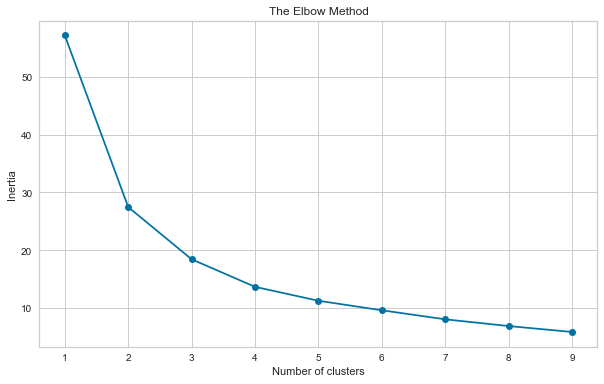

In [46]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### 2.1.2 k-means, n_cluster = 3

In [47]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(pca_transformed)

KMeans(n_clusters=3, random_state=0)

In [48]:
kmeans.labels_
df = tmp_df.copy()
df['km_cluster'] = kmeans.labels_
df.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
km_cluster,,,,,,,,,,,,,,,,,,,,,
0,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
1,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
2,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298


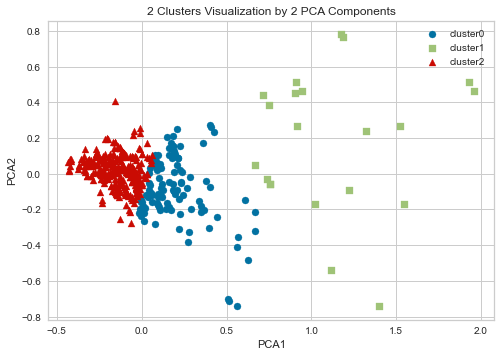

In [49]:
df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df[df['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>','<']
for i in range(marker_n):
    plt.scatter(x = df.loc[markers[i], 'pca_x'], y = df.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2','cluster3','cluster4','cluster5'])
plt.show()

In [ ]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed)      
visualizer.show()
# sil_avg = silhouette_score(data,kmeans.fit(pca_transformed))
# print(sil_avg)

In [ ]:
score = silhouette_score(data,df['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

#### 2.1.3 각 군집 별 데이터 확인

**km_cluster == 0**

In [ ]:
df_cluster_0 = df[df['km_cluster'] == 0][col]

In [ ]:
df_cluster_0.describe()

**km_cluster == 1**

In [ ]:
df_cluster_1 = df[df['km_cluster'] == 1][col]

In [ ]:
df_cluster_1.describe()

**km_cluster == 2**

In [ ]:
df_cluster_2 = df[df['km_cluster'] == 2][col]

In [ ]:
df_cluster_2.describe()

### 2.2 2차 k-means_clustering

#### 2.2.1 km_cluster == 0

- Elbow 관측

In [ ]:
df_0 = df[df['km_cluster'] == 0]
df_0 = df_0.drop('km_cluster',axis=1)
df_0

In [ ]:
col_0 = df_0.columns[3:-2]
data_0 = df_0[col_0].values

In [ ]:
pca_transformed_0 = pca.fit_transform(data_0)
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]
df_0

In [ ]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_0)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 3(Elbow)로 설정

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_0 = kmeans.fit(pca_transformed_0)
# Getting unique labels
u_labels = np.unique(label_0)

In [ ]:
df_0['km_cluster'] = kmeans.labels_
df_0.groupby('km_cluster').count()

In [ ]:
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_0['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_0[df_0['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_0.loc[markers[i], 'pca_x'], y = df_0.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

In [ ]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(pca_transformed_0)      
visualizer.show()

In [ ]:
score = silhouette_score(data_0,df_0['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

In [ ]:
df_1 = df[df['km_cluster'] == 1]
df_1 = df_1.drop('km_cluster',axis=1)
df_1

In [ ]:
col_1 = df_1.columns[3:-2]
data_1 = df_1[col_1].values

In [ ]:
pca_transformed_1 = pca.fit_transform(data_1)
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]
df_1

In [ ]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_1 = kmeans.fit(pca_transformed_1)
# Getting unique labels
u_labels = np.unique(label_1)

In [ ]:
df_1['km_cluster'] = kmeans.labels_
df_1.groupby('km_cluster').count()

In [ ]:
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_1['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_1[df_1['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_1.loc[markers[i], 'pca_x'], y = df_1.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

In [ ]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_1)      
visualizer.show()

In [ ]:
score = silhouette_score(data_1,df_1['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

In [ ]:
df_2 = df[df['km_cluster'] == 2]
df_2 = df_2.drop('km_cluster',axis=1)
df_2

In [ ]:
col_2 = df_2.columns[3:-2]
data_2 = df_2[col_2].values

In [ ]:
pca_transformed_2 = pca.fit_transform(data_2)
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]
df_2

In [ ]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_2)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_2 = kmeans.fit(pca_transformed_2)
# Getting unique labels
u_labels = np.unique(label_2)

In [ ]:
df_2['km_cluster'] = kmeans.labels_
df_2.groupby('km_cluster').count()

In [ ]:
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_2['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_2[df_2['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_2.loc[markers[i], 'pca_x'], y = df_2.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

In [ ]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_2)      
visualizer.show()

In [ ]:
score = silhouette_score(data_2,df_2['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))